In [24]:
import nibabel as nib
import os
from scipy.stats import norm

wth05_k1000 = '/Volumes/camille/IBMA_simu/test1_k025_n1000_btw1_wth250_nominal/0001/megaMFX/'
wth05_k25_n50 = '/Volumes/camille/IBMA_simu/test1_k050_btw1_wth05_nominal/0001/megaMFX/'
wth10_k1000 = '/Volumes/camille/IBMA_simu/test1_k025_n1000_btw1_wth500_nominal/0001/megaMFX/'
wth20_k1000 = '/Volumes/camille/IBMA_simu/test1_k025_n1000_btw1_wth1000_nominal/0001/megaMFX/'
wth40_k1000 = '/Volumes/camille/IBMA_simu/test1_k025_n1000_btw1_wth2000_nominal/0001/megaMFX/'
wth80_k1000 = '/Volumes/camille/IBMA_simu/test1_k025_n1000_btw1_wth4000_nominal/0001/megaMFX/'
wthdiff_k1000 = '/Volumes/camille/IBMA_simu/test1_k025_n1000_btw1_wthdiff_nominal/0001/megaMFX/'
z_05 = nib.load(os.path.join(wth05_k1000, 'stats', 'zstat1.nii.gz')).get_data().flatten()
z_diff = nib.load(os.path.join(wthdiff_k1000, 'stats', 'zstat1.nii.gz')).get_data().flatten()


p_05 = norm.sf(-z_05)
p_diff = norm.sf(-z_diff)

In [40]:
import numpy as np
hat_tau_05_k1000 = nib.load(os.path.join(wth05_k1000, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_05_k25_n50 = nib.load(os.path.join(wth05_k25_n50, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_10_k1000 = nib.load(os.path.join(wth10_k1000, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_20_k1000 = nib.load(os.path.join(wth20_k1000, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_40_k1000 = nib.load(os.path.join(wth40_k1000, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_80_k1000 = nib.load(os.path.join(wth80_k1000, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_diff_k1000 = nib.load(os.path.join(wthdiff_k1000, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()

print('hat_tau_05_k1000=' + str(np.mean(hat_tau_05_k1000)))
print('hat_tau_05_k25_n50=' + str(np.mean(hat_tau_05_k25_n50)))
print('hat_tau_10_k1000=' + str(np.mean(hat_tau_10_k1000)))
print('hat_tau_20_k1000=' + str(np.mean(hat_tau_20_k1000)))
print('hat_tau_40_k1000=' + str(np.mean(hat_tau_40_k1000)))
print('hat_tau_80_k1000=' + str(np.mean(hat_tau_80_k1000)))
print('hat_tau_diff_k1000=' + str(np.mean(hat_tau_diff_k1000)))

t_05_k1000 = nib.load(os.path.join(wth05_k1000, 'stats', 'tstat1.nii.gz')).get_data().flatten()
t_05_k25_n50 = nib.load(os.path.join(wth05_k25_n50, 'stats', 'tstat1.nii.gz')).get_data().flatten()
t_diff_k1000 = nib.load(os.path.join(wthdiff_k1000, 'stats', 'tstat1.nii.gz')).get_data().flatten()


hat_tau_05_k1000=1.0011
hat_tau_05_k25_n50=1.01029
hat_tau_10_k1000=1.00162
hat_tau_20_k1000=1.00544
hat_tau_40_k1000=1.03795
hat_tau_80_k1000=1.18375
hat_tau_diff_k1000=1.0061


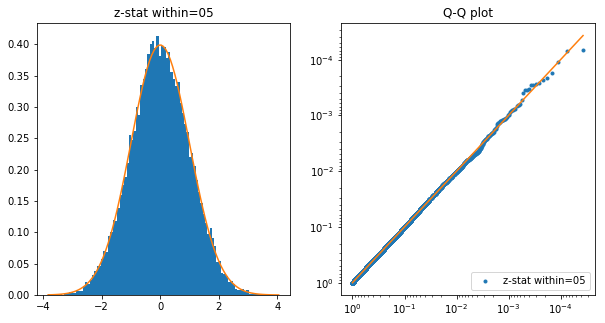

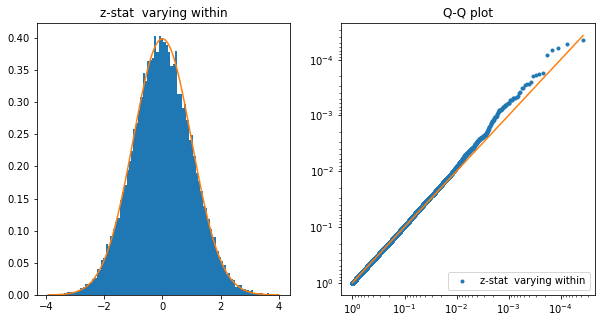

In [151]:
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import scipy.stats

def distribution_plot(title, data, dist, *args, **kwargs):
    np.random.seed(0)
    num_bins = 100
    

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))

    # histogram plot
    n, bins, patches = ax1.hist(data, num_bins, normed=1)
    y = dist.pdf(bins, *args)       
    ax1.plot(bins, y, '-')
    ax1.set_title(title)
    
    # qq-plot plot
    p_th = [t/data.size for t in range(1,data.size+1)]

    line1, = ax2.loglog(p_th, sorted(dist.sf(-data, *args)), '.', linewidth=1,
                     label=title)
    ax2.plot(p_th, p_th, '-')
    ax2.set_title('Q-Q plot')


    ax2.legend(loc='lower right')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()
       
def z_distribution_plot(data, title, *args, **kwargs):   
    distribution_plot(title, data, scipy.stats.norm)
    
z_distribution_plot(z_05, 'z-stat within=05')
z_distribution_plot(z_diff, 'z-stat  varying within')

wth05_k25_n1000
wthdiff_k25_n1000


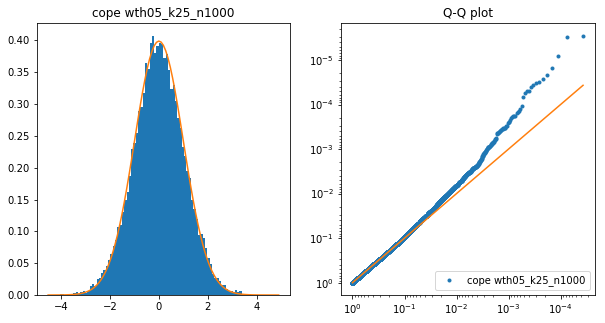

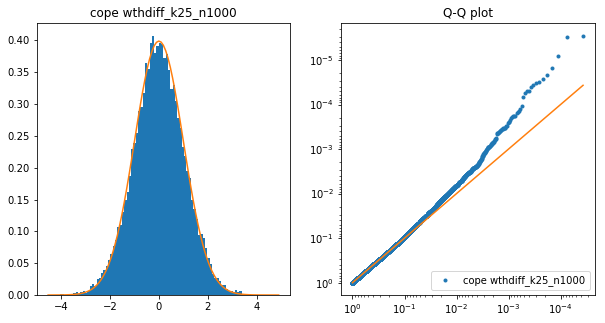

In [152]:
n = 1000;
k = 25;
cope = dict()
for i in ['05', 'diff']:
    key = 'wth' + str(i) + '_k' + str(k) + '_n' + str(n)
    print(key)
    study_dir = '/Volumes/camille/IBMA_simu/test1_k0' + str(k) + '_n' + str(n) + '_btw1_wth' + str(int(0.5*n)) + '_nominal/0001/megaMFX/'
    cope[key] = nib.load(os.path.join(study_dir, 'stats', 'tstat1.nii.gz')).get_data().flatten()
    
tau2 = 1
sigma2=0.5
sigmaC2 = tau2 + sigma2
k = 25
z_distribution_plot(cope['wth05_k25_n1000'], 'cope wth05_k25_n1000')
z_distribution_plot(cope['wthdiff_k25_n1000'], 'cope wthdiff_k25_n1000')
#     cope[str(i) + '_k' str(k) + 'n' str(n)] = 4127

# cope_05_k1000 = nib.load(os.path.join(wth05_k1000, 'stats', 'tstat1.nii.gz')).get_data().flatten()
# t_05_k25_n50 = nib.load(os.path.join(wth05_k25_n50, 'stats', 'tstat1.nii.gz')).get_data().flatten()
# t_diff_k1000 = nib.load(os.path.join(wthdiff_k1000, 'stats', 'tstat1.nii.gz')).get_data().flatten()


# def t_distribution_plot(data, title, *args, **kwargs):
#     k =25
#     dof = k-1
    
#     distribution_plot('t-stat ' + title, data, scipy.stats.t, dof)


# t_distribution_plot(t_05_k1000, 'within=05')
# # t_distribution_plot(t_05_k25_n50, 'within=05, k=50')
# t_distribution_plot(t_diff_k1000, 'varying within')


wth05_k25_n1000
wthdiff_k25_n1000
-0.000169751
1.50077
0.499978
[ 0.19207601 -0.30059078 -0.13401306 ..., -0.28571814 -0.05190331
 -0.21247995]
(27000, 25)
(27000,)
0.00509182
1.52169


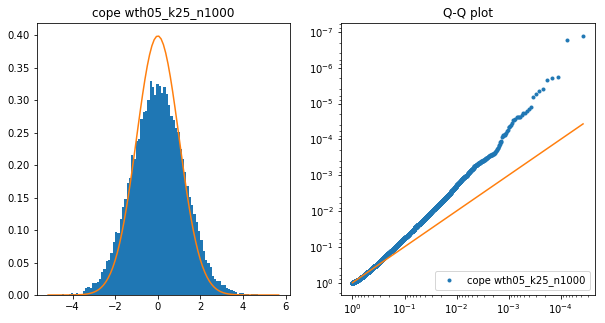

In [174]:
n = 1000;
k = 25;
copes = dict()
varcopes = dict()
for i in ['05', 'diff']:
    key = 'wth' + str(i) + '_k' + str(k) + '_n' + str(n)
    print(key)
    study_dir = '/Volumes/camille/IBMA_simu/test1_k0' + str(k) + '_n' + str(n) + '_btw1_wth' + str(int(0.5*n)) + '_nominal/0001/megaMFX/'
    copes[key] = nib.load(os.path.join(study_dir, 'cope.nii.gz')).get_data().reshape(-1,k)
    varcopes[key] = nib.load(os.path.join(study_dir, 'varcope.nii.gz')).get_data().reshape(-1,k)
    
print(np.mean(copes['wth05_k25_n1000'].flatten()))
print(np.var(copes['wth05_k25_n1000'].flatten()))
print(np.mean(varcopes['wth05_k25_n1000'].flatten()))
print(np.mean(copes['wth05_k25_n1000']/np.sqrt(0.5), axis=1))

sigma2 = 0.5

print(copes['wth05_k25_n1000'].shape)
print(copes['wth05_k25_n1000'][:,1].shape)

# Plot distribution of first cope
print(np.mean(copes['wth05_k25_n1000'][:,1].flatten()))
print(np.var(copes['wth05_k25_n1000'][:,1].flatten()))

z_distribution_plot(copes['wth05_k25_n1000'][:,1].flatten(), 'cope wth05_k25_n1000', 0, np.sqrt(sigma2))

In [180]:
aa = nib.load(os.path.join(study_dir, 'cope.nii.gz')).get_data()
bb = aa.reshape(-1,25)
bb[:,1] == 

(27000, 25)

In [158]:
print(1/np.sqrt(sigma2))
print(sigma2)

1.41421356237
0.5


In [130]:
print(np.mean(cope['wth05_k25_n1000']))
print(np.std(cope['wth05_k25_n1000']))
print(np.var(cope['wth05_k25_n1000']))

print(np.mean(np.divide(cope['wth05_k25_n1000'],np.sqrt(sigmaC2/k))))
print(np.std(np.divide(cope['wth05_k25_n1000'],np.sqrt(sigmaC2/k))))
print(np.sqrt(sigmaC2/k))

print(cope['wth05_k25_n1000'])
print(np.divide(cope['wth05_k25_n1000'],np.sqrt(sigmaC2/k)))
print(np.sqrt(1.5/25))
print(np.sqrt(sigmaC2/k))
print(sigmaC2)

-0.00194183
1.04272
1.08727
-0.00947513
5.08797
0.204939015319
[ 0.46764287 -1.10363793 -0.36858878 ..., -0.9537046  -0.18245985
 -0.64465582]
[ 2.28186345 -5.38520145 -1.79852903 ..., -4.65360165 -0.89031285
 -3.14559817]
0.244948974278
0.204939015319
1.05


In [ ]:
def t_distribution_plot(data, title, *args, **kwargs):
    k =25
    dof = k-1
    
    distribution_plot('t-stat ' + title, data, scipy.stats.t, dof)


t_distribution_plot(t_05_k1000, 'within=05')
# t_distribution_plot(t_05_k25_n50, 'within=05, k=50')
t_distribution_plot(t_diff_k1000, 'varying within')

/Users/cmaumet/anaconda/envs/r-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


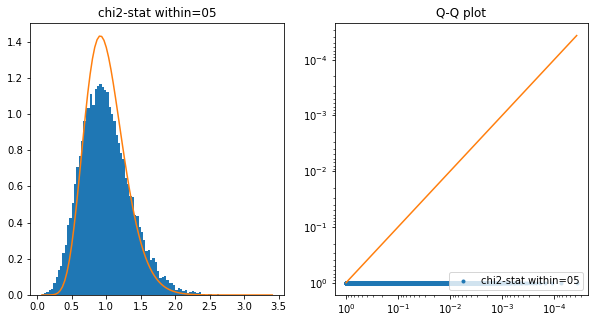

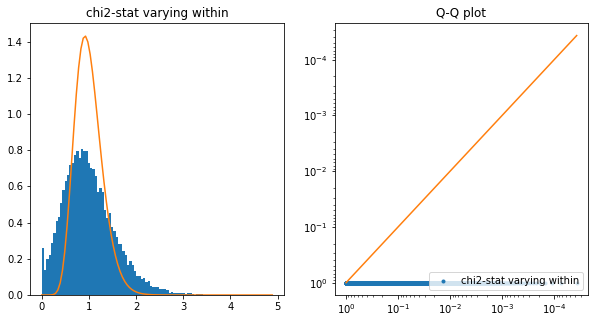

In [76]:
def chi2_distribution_plot(data, title, *args, **kwargs):
    
    
    k =25
    sigma2 = 1
    dof = k-1
    
    distribution_plot('chi2-stat ' + title, data, scipy.stats.chi2, dof, 0, 1/dof)

chi2_distribution_plot(hat_tau_05_k1000, 'within=05')
# chi2_distribution_plot(hat_tau_10_k1000, 'within=10')
# chi2_distribution_plot(hat_tau_20_k1000, 'within=20')
chi2_distribution_plot(hat_tau_diff_k1000, 'varying within')


# figure;plot(sort(Sn.MaxT(:,1)),sort(PT.MaxT(:,1)),'b+'); refline(1,0)
# xlabel('SnPM MaxT');ylabel('RapidPT MaxT')
# (prctile(Sn.MaxT(:,1),95)-prctile(PT.MaxT(:,1),95))/prctile(Sn.MaxT(:,1),95)*100  % 4.6% diff in threshold
# (sum(Sn.MaxT(:,1)>=prctile(PT.MaxT(:,1),95))+1)/(size(Sn.MaxT,1)+1)  % SnPM's P-value for RapidPT's threshold: 0.0807


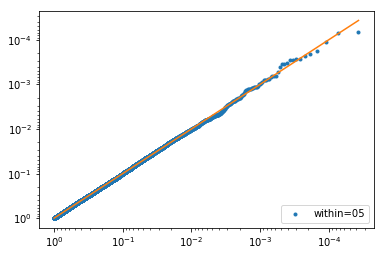

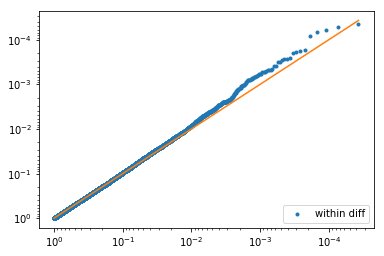

In [46]:
# fig = sm.qqplot(z_05, line='s', loc=0, scale=1)
# plt.show()

# fig = sm.qqplot(z_diff, line='s', loc=0, scale=1)
# plt.show()

# scipy.stats.probplot(p_05, dist="uniform", plot=plt)
# plt.show()

# scipy.stats.probplot(p_diff, dist="uniform", plot=plt)
# plt.show()
def qq_plot(data, title, *args, **kwargs):
    p_th = [t/27000 for t in range(1,27001)]

    fig, ax = plt.subplots()
    line1, = ax.loglog(p_th, sorted(data), '.', linewidth=1,
                     label=title)
    ax.plot(p_th, p_th, '-')


    ax.legend(loc='lower right')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

qq_plot(p_05, 'within=05')
qq_plot(p_diff, 'within diff')

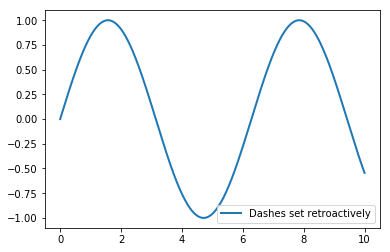

In [9]:
# Sn=load('TwoSampT-12-12-SnPM2/SnPM');
# PT=load('TwoSampT-12-12-RPT2/SnPM');
# figure;plot(sort(Sn.MaxT(:,1)),1e-4:1e-4:1,sort(PT.MaxT(:,1)),1e-4:1e-4:1);legend('SnPM','RapidPT');title('CDF comparison')

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 10, 500)

fig, ax = plt.subplots()
line1, = ax.plot(x, np.sin(x), '-', linewidth=2,
                 label='Dashes set retroactively')


ax.legend(loc='lower right')
plt.show()